In [57]:
from check_result import evaluate

### Word Corruption Evaluation

All noisy words:  9970
Intact Word Corruption:  8623


/home/xinzhel/.pyenv/versions/3.7.9/envs/allennlp-dev/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Clean Accuracy: 0.9431752290386176  for 8623 examples.
only keep rows of which clean text is correctly predicted in df
Misclassification Rate:
<0.3 (74): 0.08108108108108103  (cos_sim: {0.7015552152753681} )
0.3-0.8 (8014): 0.2728974294983778  (cos_sim: {0.4543004515846073} )
>0.8 (45): 0.28888888888888886  (cos_sim: {0.46233243396402235} )
Metric for 1
0.1470588235294118
conf: 0.8355075757238356
Metric for 2
0.27165775401069514
conf: 0.7169480745903656
Metric for 3
0.2780207763805358
conf: 0.7073370574510885
Metric for 4
0.2395382395382395
conf: 0.7432957744222878
Metric for 5
0.25
conf: 0.7186064355773851
Score Distribution:  {1: 34, 2: 3740, 3: 3658, 4: 693, 5: 8}
Misclassification Rate for noise0:  0.26167076167076164
avg sim for noise0:  0.45906258393570304
Misclassification Rate for noise1:  0.28132678132678135
avg sim for noise1:  0.46114816824527904
Misclassification Rate for noise2:  0.29556650246305416
avg sim for noise2:  0.43556729114724535
Misclassification Rate for noise3

/home/xinzhel/.pyenv/versions/3.7.9/envs/allennlp-dev/lib/python3.7/site-packages/ipykernel_launcher.py:115: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


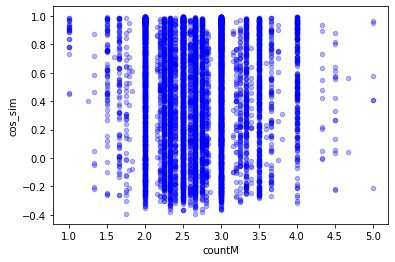

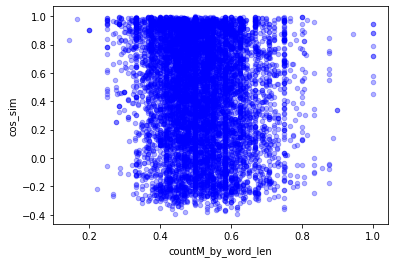

In [73]:
output_dir = "outputs_local_mixed_noise"
dataset_name = "yelp"
model_name = 'albert-base-v2-yelp'
seq_max_len=None
# Evaluate tokenizers via WCR
# df = evaluate(dataset_name = dataset_name, model_name=model_name, acc=False)

# Evaluate PLMs via accuracy and cosine similarity
# Evaluating PLMs
df = evaluate(
    output_dir = output_dir,
    dataset_name = dataset_name, 
    model_name=model_name, 
    acc=True, 
    mode="intact", 
    seq_max_len=seq_max_len, 
    countM_by_word_len_min_val = 0.3,
    countM_by_word_len_max_val=0.8,
    no_consistent_pred=False,
    print_acc_sim_by_noise=True)
